## Final Project Submission

Please fill out:
* Student name: Robert Gesembe
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Veronica Isiaho
* Blog post URL:


# What Makes a Movie Profitable? 
## 1. Business Understanding
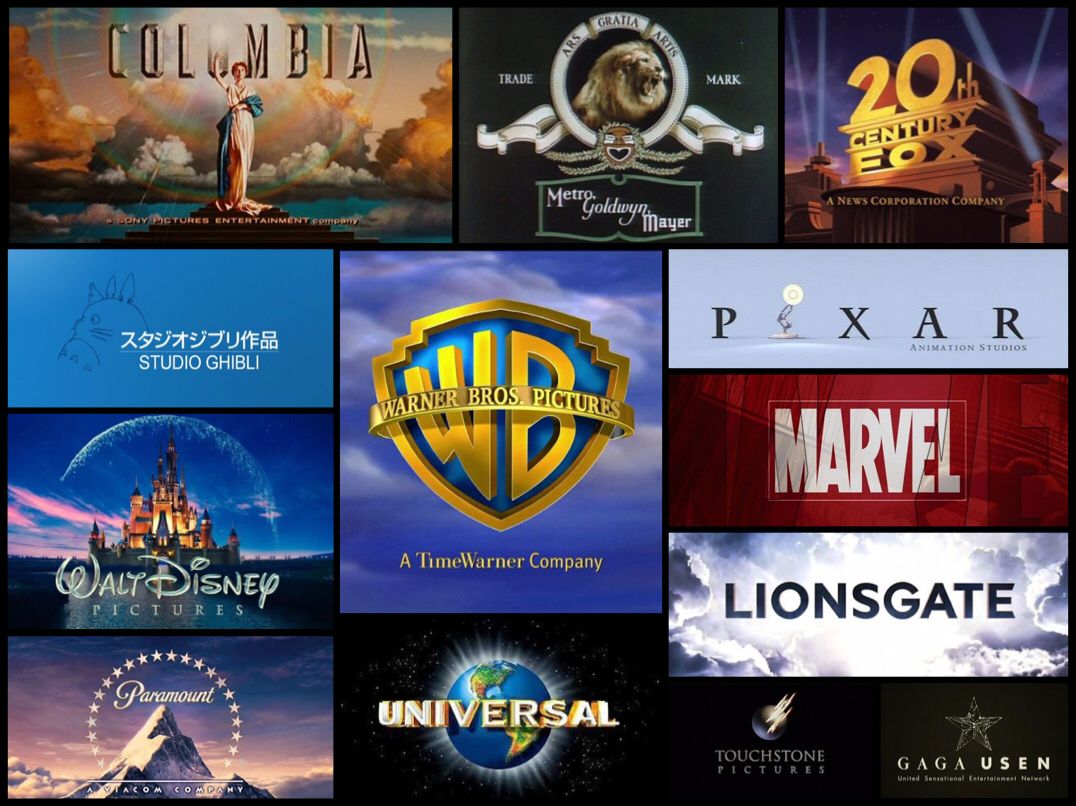
### 1.1 Introduction
Microsoft Corporation, a global technology firm, engages in the development, manufacturing, licensing, support, and sale of computer software, consumer electronics, and personal computers. It is renowned for its flagship offerings such as the Windows operating system, Microsoft Office suite, and Azure cloud computing platform. Expanding into various industries allows a company to reduce reliance on a single sector, enter untapped markets, cross-sell, adapt to changing consumer demands, and ensure long-term success.
Diversifying to produce original video content can aid Microsoft in broadening its brand presence and reaching a larger audience, thereby improving its overall visibility and reputation. Additionally, movies offer opportunities for cross-promotion and product placements, enabling Microsoft to showcase its products and services to a vast viewership. Venturing into the film industry can create fresh revenue streams through licensing and distribution agreements.
### 1.2 Business Problem
Effective diversification requires a strategic approach backed by thorough market research to ensure a successful expansion. It's crucial to have a clear understanding of market trends, including investment levels and potential returns. Equally important is grasping customer preferences to invest in products that align with demand and promise substantial returns. This knowledge empowers decision-making, allows product customization for the target audience, facilitates the creation of impactful marketing strategies, and helps in risk mitigation. By gaining insights into the opportunities and challenges of the new market, a company positions itself for successful diversification and increases the likelihood of achieving its goals.
While the movie industry has delivered substantial profits to companies, such gains aren't guaranteed due to various risk factors at play. In this context, I examine historical data encompassing diverse variables to identify the key determinants of profitability in the movie business, offering valuable insights to inform investment decisions.

### 1.3 Main Objective
To determine factors that influence profitability of movie genres.
#### Specific Objectives
1. What are the top produced genres of movies?
2. Do average rating, runtimes, budget and production budget influence profitability of movies?
3. What genres should the company consider investing in?
### 1.4 Business Analysis Orientation
In order to provide insights and enforce the company penetration market strategies in the movie industry, our results will focus on the following strategic orientations:

 1. Top 10  competitors in the market (Top highest movie studios)
 2. The most profitable movie market(Domestic or foreign)
 3. The movie segmentation per movie genres.
 4. The movie genre that the company should target the most.
 5. The gross income view on the movie average ratings.
 6. The average number of movies produced in a year

### 1.5 Document Organization
 1. Loading and Checking Data
 2. Data Cleaning 
 3. Exploratory Data Analysis 
 4. Conclusions and Recommendations
## 2 Importing Relevant Libraries and Reading Data

In [3]:
# importing packages relevant for the project
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Load Movie Title Data sets for the Project
title_basics = pd.read_csv('zippedData/title.basics.csv')
title_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [5]:
#Load Movie Rating Data sets for the Project
movie_ratings = pd.read_csv('zippedData/title.ratings.csv')
movie_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [6]:
#Load Movie Title Data sets for the Project
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


## 3. Data Wrangling
### 3.1 Combining the three Dataframes
The three csv files are joined to be one then irrelevant columns are dropped from the combined data set

In [7]:
#merging the Data Sets
title_basics_df = pd.DataFrame(title_basics)
title_ratings_df = pd.DataFrame(movie_ratings)
bom_movie_gross_df = pd.DataFrame(movie_gross)

# Combine first level (two tables)
combined_t1 = pd.merge(title_basics_df, title_ratings_df, on='tconst', how='left')

# Combine second level (combined table and the third table)
combined_t2 = pd.merge(combined_t1, bom_movie_gross_df, left_on='primary_title', right_on='title', how='left')
combined_t2.sample(3)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
78691,tt4516338,RedBook,RedBook,2015,NaN,Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131288,tt8164398,If I Don't Make It Home,If I Don't Make It Home,2018,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,tt0477080,Unstoppable,Unstoppable,2010,98.0,"Action,Thriller",6.8,173019.0,Unstoppable,Fox,81600000.0,86200000,2010.0


### 3.2 Dropping Irrelevant Columns
The dataset has eight columns namely; start_year, runtime_minutes, genres, averagerating, numvotes, ,studio, domestic_gross, foreign_gross	

In [8]:
#The loaded data from three files  has irrelevant columns in relation to the objective.

final_data= combined_t2.drop (['tconst','primary_title','original_title','year', 'title'], axis=1)
final_data.head(5)

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN
1,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN
2,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN
3,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN
4,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN


### 3.3 Checking the Data Shape

In [9]:
# Determining the no. of records in  dataset
final_data.shape

(146146, 8)

In [10]:
# Previewing the top of  dataset
final_data.head()

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,2013,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN
1,2019,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN
2,2018,122.0,Drama,6.9,4517.0,NaN,NaN,NaN
3,2018,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN
4,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN


<Axes: >

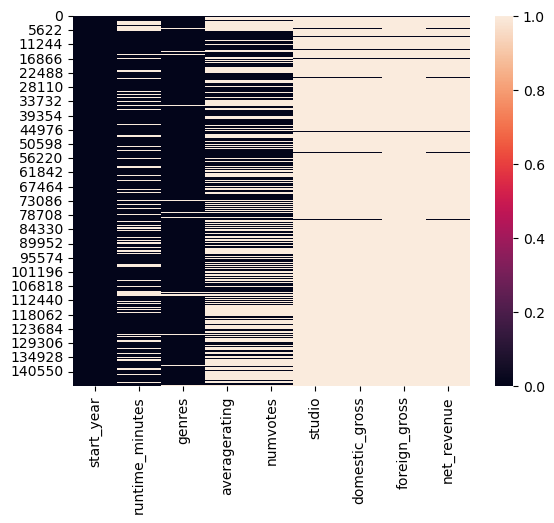

In [243]:
# Visualizing missing values
sns.heatmap(final_data.isnull())

### 3.4 Feature Engineering
Add the domestic_gross revenue and foreign_gross revenue so as to obtain the Net_revenue. First we convert the data type of foreign_gross from object to float64

In [11]:
# Replace commas with an empty string to remove thousands separators
final_data['foreign_gross'] = final_data['foreign_gross'].str.replace(',', '', regex=True)

# Convert the 'foreign_gross' column to float
final_data['foreign_gross'] = pd.to_numeric(final_data['foreign_gross'], errors='coerce')

# Convert the 'domestic_gross' column to float
final_data['domestic_gross'] = pd.to_numeric(final_data['domestic_gross'], errors='coerce')

# Calculate the 'Total_gross_revenue' by adding 'foreign_gross' and 'domestic_gross'
final_data['net_revenue'] = final_data['foreign_gross'].add(final_data['domestic_gross'], fill_value=0)

# Filter rows with non-null 'Total_gross_revenue'
prep_sample = final_data[final_data['net_revenue'].notna()]

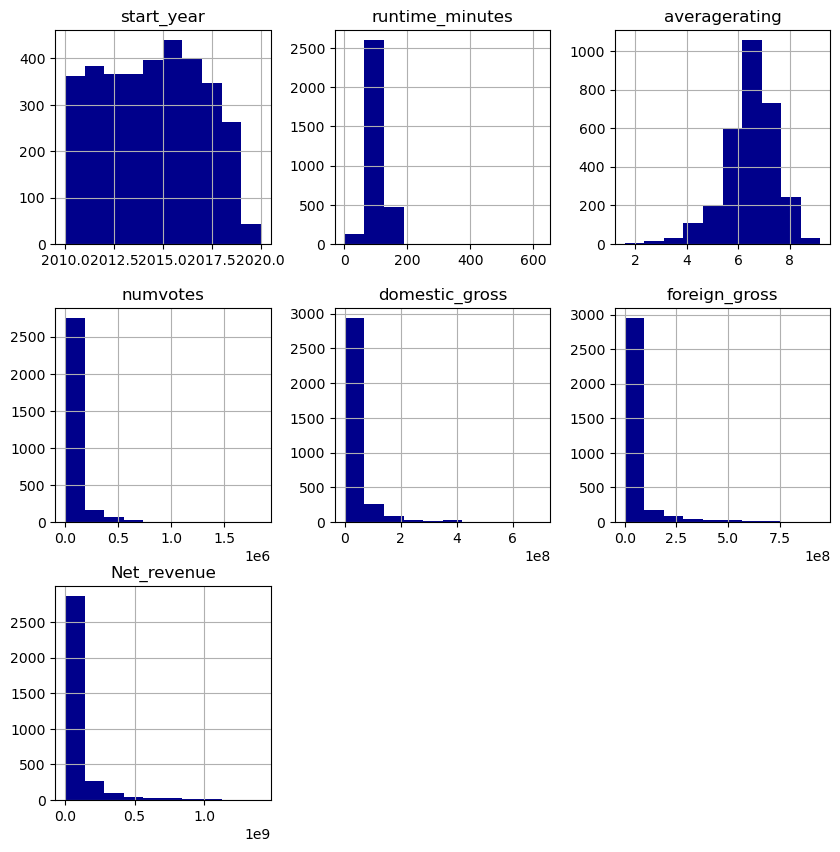

In [143]:
# Look at histograms to get idea of how variables are distrubuted (overall)
prep_sample.hist(color='DarkBlue',figsize= (10,10));

### 3.5 Data Imputation with Mean, Mode and Median

All variables are skewed. The only variable that is closed to a normal distribution is Averagerating. (slightly right skewed).

In [12]:
# Make a copy of the DataFrame to ensure changes are made to the original
prep_sample = prep_sample.copy()

# Replace NaN values in 'domestic_gross' and 'foreign_gross' with zero
prep_sample['domestic_gross'].fillna(0, inplace=True)
prep_sample['foreign_gross'].fillna(0, inplace=True)


In [13]:
# Calculate the mode for categorical missing Data and impute
mode_studio = prep_sample['studio'].mode()[0]  
mode_genres = prep_sample['genres'].mode()[0]  

# Replace NaN values with the respective modes
prep_sample['studio'].fillna(mode_studio, inplace=True)  
prep_sample['genres'].fillna(mode_genres, inplace=True)  


In [14]:
# Calculate the median and mean for discrete and continuous missing Data and impute
mean_averagerating = prep_sample['averagerating'].mean()
median_runtime_minutes = prep_sample['runtime_minutes'].median() 
median_numvotes = prep_sample['numvotes'].median()
# Replace NaN values with the respective modes
prep_sample['averagerating'].fillna(mean_averagerating, inplace=True)  
prep_sample['runtime_minutes'].fillna(median_runtime_minutes, inplace=True)  
prep_sample['numvotes'].fillna(median_numvotes, inplace=True)


In [15]:
prep_sample.head()

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,net_revenue
38,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Relbig.,1100000.0,0.0,1100000.0
48,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000.0,8744000.0
54,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000.0,188100000.0
58,2014,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000.0,53200000.0
60,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Uni.,652300000.0,1019.4,652301019.4


In [16]:
prep_sample.tail()

,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,net_revenue
145431,2019,103.0,Drama,5.200000,26.0,Wein.,7200000.0,7700000.0,14900000.0
145505,2018,90.0,Drama,6.457582,13109.0,Gold.,22800.0,0.0,22800.0
145666,2019,103.0,"Action,Drama",4.700000,14.0,Uni.,87000000.0,18000000.0,105000000.0
145702,2019,90.0,Crime,6.457582,13109.0,Magn.,613000.0,0.0,613000.0
146080,2019,84.0,Documentary,8.100000,8.0,Fox,81600000.0,86200000.0,167800000.0


In [17]:
# Determining the no. of records in  dataset
prep_sample.shape

(3366, 9)

In [18]:
# Checking whether each column has an appropriate datatype
prep_sample.dtypes

start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
studio              object
domestic_gross     float64
foreign_gross      float64
net_revenue        float64
dtype: object

In [19]:
# Checking for missing values 
prep_sample.isna().sum()

start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
net_revenue        0
dtype: int64

In [20]:
# Overall Descriptive statistics
prep_sample.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,net_revenue
count,3366.000000,3366.000000,3366.000000,3.366000e+03,3.366000e+03,3.366000e+03,3.366000e+03
mean,2013.957516,104.806001,6.457582,5.680652e+04,2.965265e+07,4.524915e+07,7.490180e+07
std,2.530699,24.205720,0.959933,1.199183e+05,6.513842e+07,1.111324e+08,1.685212e+08
min,2010.000000,2.000000,1.600000,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
25%,2012.000000,93.000000,6.000000,2.871250e+03,1.250000e+05,0.000000e+00,3.022500e+05
50%,2014.000000,103.000000,6.457582,1.310900e+04,1.800000e+06,2.500000e+06,6.800000e+06
75%,2016.000000,116.000000,7.100000,5.209300e+04,3.120000e+07,3.110000e+07,6.740000e+07
max,2020.000000,623.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,1.405400e+09


# 4.0 Exploratory Data Analysis (EDA)
### 4.1 Univariate Analysis


In [21]:
# AGroup movies by genre and rank them
grouped_data = prep_sample.groupby('genres').size().sort_values(ascending=False).reset_index(name='count')

# Display the top 10 genres with adjusted index starting from 1
top_10_genres = grouped_data.head(10).reset_index(drop=True)
top_10_genres.index = top_10_genres.index + 1
top_10_genres[['genres', 'count']]

,genres,count
1,Drama,432
2,Documentary,168
3,"Comedy,Drama,Romance",138
4,"Comedy,Drama",137
5,"Drama,Romance",115
6,Comedy,112
7,"Adventure,Animation,Comedy",75
8,"Comedy,Romance",73
9,"Drama,Thriller",55
10,"Action,Crime,Drama",47


Drama is the most common genre with a count of 432. Documentary and Comedy,Drama,Romance follow with 168 and 138 counts, respectively.

In [22]:
# Group movies by genre and calculate the average rating for top 10 genres 
grouped_genre_averagerating = prep_sample.groupby('genres')['averagerating'].mean().reset_index()

# Sort the genres based on the averagerating in descending order
sorted_genre_averagerating = grouped_genre_averagerating.sort_values(by='averagerating', ascending=False)

# Select the top 10 genres as per averagerating
top_10_genres_averagerating = sorted_genre_averagerating.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_averagerating = top_10_genres_averagerating.reset_index(drop=True)
top_10_genres_averagerating.index = top_10_genres_averagerating.index + 1

# Display the top 10 genres with their average ratings
top_10_genres_averagerating[['genres', 'averagerating']]

,genres,averagerating
1,"Action,Sport",8.40
2,"Adventure,Drama,Sci-Fi",8.30
3,"Animation,Drama,Romance",8.20
4,"Comedy,Drama,Thriller",8.10
5,"Biography,Documentary,Thriller",8.10
6,"Documentary,History,War",8.00
7,"Comedy,Crime,Documentary",8.00
8,"Animation,Drama,Fantasy",7.95
9,Sport,7.90
10,"Crime,Documentary,History",7.85


In [23]:
# Group movies by genre and calculate the total worldwide gross for top 10 genres
grouped_genre_worldwidegross = prep_sample.groupby('genres')['net_revenue'].sum().reset_index()

# Sort the genres based on the worldwide gross in descending order
sorted_genre_worldwidegross = grouped_genre_worldwidegross.sort_values(by='net_revenue', ascending=False)

# Select the top 10 genres as per worldwide_gross
top_10_genres_worldwidegross = sorted_genre_worldwidegross.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_worldwidegross.index = range(1, len(top_10_genres_worldwidegross) + 1)

# Display the genres and their worldwide gross
top_10_genres_worldwidegross[['genres', 'net_revenue']]

,genres,net_revenue
1,"Action,Adventure,Sci-Fi",2.763610e+10
2,"Adventure,Animation,Comedy",2.760733e+10
3,Drama,1.416544e+10
4,"Action,Adventure,Fantasy",1.331489e+10
5,"Action,Adventure,Comedy",9.666672e+09
6,Documentary,6.675822e+09
7,"Action,Adventure,Thriller",6.600098e+09
8,"Action,Adventure,Animation",6.454160e+09
9,Comedy,5.517496e+09
10,"Action,Adventure,Drama",5.360137e+09


In [34]:
# Group movies by studio and calculate the average rating for top 10 genres 
grouped_genre_averagerating = prep_sample.groupby('studio')['averagerating'].mean().reset_index()

# Sort the genres based on the averagerating in descending order
sorted_genre_averagerating = grouped_genre_averagerating.sort_values(by='averagerating', ascending=False)

# Select the top 10 genres as per averagerating
top_10_genres_averagerating = sorted_genre_averagerating.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_averagerating = top_10_genres_averagerating.reset_index(drop=True)
top_10_genres_averagerating.index = top_10_genres_averagerating.index + 1

# Display the top 10 genres with their average ratings
top_10_genres_averagerating[['studio', 'averagerating']]

,studio,averagerating
1,Trafalgar,8.8
2,GrtIndia,8.3
3,SHO,8.2
4,BSC,8.1
5,Pala.,8.1
6,App.,7.9
7,Good Deed,7.8
8,WOW,7.7
9,MUBI,7.7
10,U/P,7.7


In [35]:
# Group movies by genre and calculate the total worldwide gross for top 10 genres
grouped_genre_worldwidegross = prep_sample.groupby('studio')['net_revenue'].sum().reset_index()

# Sort the genres based on the worldwide gross in descending order
sorted_genre_worldwidegross = grouped_genre_worldwidegross.sort_values(by='net_revenue', ascending=False)

# Select the top 10 genres as per worldwide_gross
top_10_genres_worldwidegross = sorted_genre_worldwidegross.head(10)

# Reset the index and adjust it to start from 1
top_10_genres_worldwidegross.index = range(1, len(top_10_genres_worldwidegross) + 1)

# Display the genres and their worldwide gross
top_10_genres_worldwidegross[['studio', 'net_revenue']]

,studio,net_revenue
1,BV,4.784875e+10
2,Uni.,3.569238e+10
3,Fox,3.160737e+10
4,WB,2.694990e+10
5,Par.,1.883129e+10
6,Sony,1.874129e+10
7,WB (NL),1.195570e+10
8,LGF,8.611666e+09
9,P/DW,5.076500e+09
10,Wein.,4.611567e+09


### 4.2 Data Visualizations
#### 4.2.1 Top 10 Movie Genres Produced

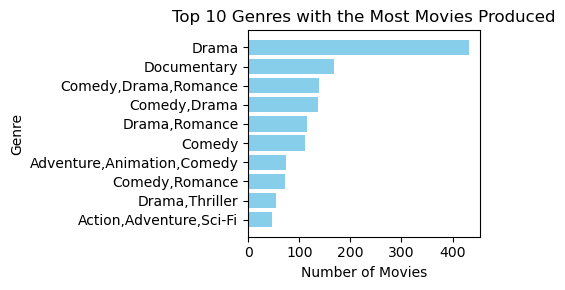

In [24]:
# Group the data by genres and count the movies for each genre
movie_counts = prep_sample['genres'].value_counts().sort_values(ascending=False)

# Select the top 10 genres
top_10_genres = movie_counts.head(10).sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 genres
plt.figure(figsize=(5, 3))
plt.barh(top_10_genres.index, top_10_genres.values, height=0.8, color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Genres with the Most Movies Produced')
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


#### 4.2.2 Top 10 Movie Genres in Revenue

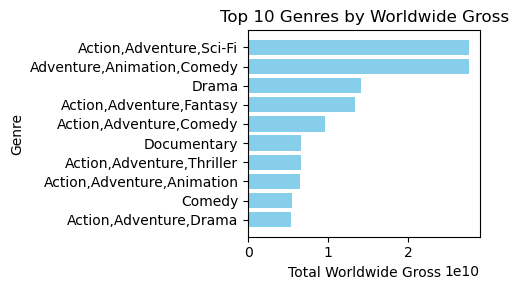

In [25]:
# Group movies by genre and calculate the total worldwide gross for top 10 genres
grouped_genre_worldwidegross = prep_sample.groupby('genres')['net_revenue'].sum().reset_index()

# Sort the genres based on the worldwide gross in descending order
sorted_genre_worldwidegross = grouped_genre_worldwidegross.sort_values(by='net_revenue', ascending=False)

# Select the top 10 genres as per worldwide_gross
top_10_genres_worldwidegross = sorted_genre_worldwidegross.head(10).sort_values(by='net_revenue', ascending=True)

# Reset the index and adjust it to start from 1
top_10_genres_worldwidegross.index = range(1, len(top_10_genres_worldwidegross) + 1)
# Create a horizontal bar chart
plt.figure(figsize=(5, 3))
plt.barh(top_10_genres_worldwidegross['genres'], top_10_genres_worldwidegross['net_revenue'], color='skyblue')
plt.xlabel('Total Worldwide Gross')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Worldwide Gross')
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


#### 4.2.3 Top 10 Movie Genres in Ratings

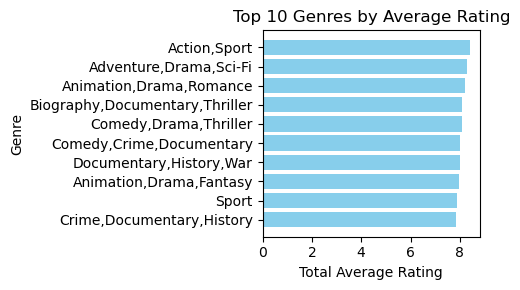

In [26]:
# Group movies by genre and calculate the total worldwide gross for top 10 genres
grouped_genre_worldwidegross = prep_sample.groupby('genres')['averagerating'].mean().reset_index()

# Sort the genres based on the worldwide gross in descending order
sorted_genre_worldwidegross = grouped_genre_worldwidegross.sort_values(by='averagerating', ascending=False)

# Select the top 10 genres as per worldwide_gross
top_10_genres_worldwidegross = sorted_genre_worldwidegross.head(10).sort_values(by='averagerating', ascending=True)

# Reset the index and adjust it to start from 1
top_10_genres_worldwidegross.index = range(1, len(top_10_genres_worldwidegross) + 1)
# Create a horizontal bar chart
plt.figure(figsize=(5, 3))
plt.barh(top_10_genres_worldwidegross['genres'], top_10_genres_worldwidegross['averagerating'], color='skyblue')
plt.xlabel('Total Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Rating')
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


#### 4.2.4 Top 10 Movie Genres in Votes

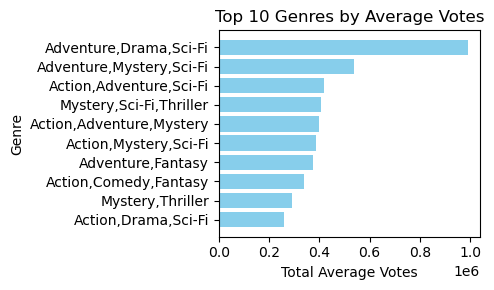

In [27]:
# Group movies by genre and calculate the total worldwide gross for top 10 genres
grouped_genre_worldwidegross = prep_sample.groupby('genres')['numvotes'].mean().reset_index()

# Sort the genres based on the worldwide gross in descending order
sorted_genre_worldwidegross = grouped_genre_worldwidegross.sort_values(by='numvotes', ascending=False)

# Select the top 10 genres as per worldwide_gross
top_10_genres_worldwidegross = sorted_genre_worldwidegross.head(10).sort_values(by='numvotes', ascending=True)

# Reset the index and adjust it to start from 1
top_10_genres_worldwidegross.index = range(1, len(top_10_genres_worldwidegross) + 1)
# Create a horizontal bar chart
plt.figure(figsize=(5, 3))
plt.barh(top_10_genres_worldwidegross['genres'], top_10_genres_worldwidegross['numvotes'], color='skyblue')
plt.xlabel('Total Average Votes')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Votes')
plt.tight_layout()

# Show the horizontal bar chart
plt.show()


### 4.3 Correlation

In [28]:
#Correlation between revenue and averagerating
correlation_revenue_averagerating = prep_sample['net_revenue'].corr(final_data['averagerating'])
correlation_revenue_averagerating = round(correlation_revenue_averagerating, 2)
print("The correlation between revenue and averagerating is", correlation_revenue_averagerating )

The correlation between revenue and averagerating is 0.12


In [29]:
#Correlation between revenue and runtimeminutes
correlation_revenue_runtimemin = prep_sample['net_revenue'].corr(final_data['runtime_minutes'])
correlation_revenue_runtimemin = round(correlation_revenue_runtimemin, 2)
print("The correlation between runtimeminutes and averagerating is", correlation_revenue_runtimemin )

The correlation between runtimeminutes and averagerating is 0.13


In [30]:
#Correlation between runtimeminutes and averagerating
correlation_runtimemin_averagerating = prep_sample['runtime_minutes'].corr(final_data['averagerating'])
correlation_runtimemin_averagerating = round(correlation_runtimemin_averagerating, 2)
print("The correlation between runtimeminutes and averagerating is", correlation_runtimemin_averagerating )

The correlation between runtimeminutes and averagerating is 0.15


In [31]:
#Correlation between numvotes and averagerating
correlation_numvotes_averagerating = prep_sample['numvotes'].corr(final_data['averagerating'])
correlation_numvotes_averagerating = round(correlation_numvotes_averagerating, 2)
print("The correlation between numvotes and averagerating is", correlation_numvotes_averagerating )

The correlation between numvotes and averagerating is 0.28


In [32]:
#Correlation between numvotes and runtimeminutes
correlation_numvotes_runtimeminutes = prep_sample['numvotes'].corr(final_data['runtime_minutes'])
correlation_numvotes_runtimeminutes = round(correlation_numvotes_runtimeminutes, 2)
print("The correlation between numvotes and runtimeminutes is", correlation_numvotes_runtimeminutes )

The correlation between numvotes and runtimeminutes is 0.24


In [33]:
#Correlation between numvotes and net_revenue
correlation_numvotes_netrevenue = prep_sample['numvotes'].corr(final_data['net_revenue'])
correlation_numvotes_netrevenue = round(correlation_numvotes_netrevenue, 2)
print("The correlation between numvotes and net_revenue is", correlation_numvotes_netrevenue )

The correlation between numvotes and net_revenue is 0.63


# Conclusions
The relationship between revenue and numvotes is positively correlated at 0.63, while there is a weaker positive correlation with both average rating (0.12) and runtime minutes (0.20). These correlations suggest that larger production budgets tend to result in greater profits, whereas the influence of average rating and runtime is comparatively less significant.

A comparison of the top 10 genres and the highest-rated genres in terms of gross revenue and profitability reveals that having high ratings does not guarantee a movie's profitability.

The genres with the highest production budgets and profits are Action, Adventure, Sci-Fi, Animation, and Comedy.

Genres such as Drama, Documentary, Adventure, Sci-Fi, and Drama receive high ratings despite having moderate production budgets.

Drama, Comedy, Animation, and Adventure, Comedy are popular genres with moderate production budgets and modest returns.

Investing in larger production budgets has the potential to yield higher profits. This suggests that allocating more financial resources to film production could be a viable strategy for maximizing returns on investment. However, it's important to acknowledge that there are other factors influencing profitability in the film industry, and further research is needed in this regard.







# Recommendations
When selecting a film to produce, it's essential to prioritize genre, production budget, and profitability, with average ratings following closely behind.
Concentrate on genres with substantial budgets and strong profit potential: Genres like Action, Adventure, Sci-Fi, Animation, Comedy, and Fantasy are marked by both high production budgets and noteworthy profits. Investing in these genres offers the prospect of a solid return on investment due to their widespread appeal and financial success.

Consider genres with high ratings and reasonable production budgets: Genres such as Drama, Documentary, Sci-Fi, and Adventure have received high ratings while maintaining moderate production budgets. These genres strike a balance between critical acclaim and financial viability, making them promising investment choices.

Explore possibilities in genres that are currently in demand and come with manageable production budgets: Genres like Drama, Comedy, Animation, and Adventure have garnered popularity while keeping their production costs in check. Investing in these genres can tap into a broad audience base while efficiently handling production expenses, potentially leading to profitability.